<a href="https://colab.research.google.com/github/DarshanSuresh/Machine-Learning/blob/main/LAB_03_09_August_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

# Data Analysis

In [ ]:
mat_df = pd.read_csv('/content/student-mat.csv')
pd.set_option('display.max_columns',None)
mat_df.head(8)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6


In [ ]:
print(mat_df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
print(mat_df.shape)

(395, 33)


In [ ]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
mat_df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


## LabelEncoding for non numeric columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
le = LabelEncoder()

for column in categorical_columns:
    mat_df[column] = le.fit_transform(mat_df[column])

In [ ]:
mat_df.head(8)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,1,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5,6


## Drop the 'Unnamed: 0' , G1 and G2 columns and add 'Mean' column

In [ ]:
mat_df['Mean'] = (mat_df['G1'] + mat_df['G2'] + mat_df['G3'])/3
# Drop G1 and G2 as its highly correlated with eachother, and correlated with G3 as well
mat_df = mat_df.drop(['G1','G2'], axis='columns')

In [ ]:
mat_df.head(8)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mean
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6,5.666667
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,6,5.333333
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,10,8.333333
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14.666667
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10,8.666667
5,0,1,16,1,1,1,4,3,3,2,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15.000000
6,0,1,16,1,1,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,11,11.666667
7,0,0,17,1,0,0,4,4,2,4,1,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5.666667


# Feature Selection


## SelectKBest class to extract top 20 best features selection

In [ ]:
X = mat_df.iloc[:,0:-1]
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,0,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9
391,1,1,17,1,1,1,3,1,3,3,0,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,16
392,1,1,21,0,0,1,1,1,2,2,0,2,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,7
393,1,1,18,0,1,1,3,2,3,2,0,1,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,10


In [ ]:
y = mat_df.iloc[:,-1]
y

,Mean
0,5.666667
1,5.333333
2,8.333333
3,14.666667
4,8.666667
...,...
390,9.000000
391,15.333333
392,8.333333
393,11.000000


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

select = SelectKBest(score_func=f_regression, k=20)
z = select.fit_transform(X, y)

print("After selecting best 20 features:", z.shape)
features = X.columns
filter = select.get_support()
print(features)
print(features[filter])
X = X[features[filter]]
X

After selecting best 20 features: (395, 20)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')
Index(['sex', 'age', 'address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'reason',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'paid', 'higher',
       'internet', 'romantic', 'goout', 'Walc', 'health', 'G3'],
      dtype='object')


,sex,age,address,famsize,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,Walc,health,G3
0,0,18,1,0,4,4,0,0,2,2,0,1,0,1,0,0,4,1,3,6
1,0,17,1,0,1,1,0,0,1,2,0,0,0,1,1,0,3,1,3,6
2,0,15,1,1,1,1,0,2,1,2,3,1,1,1,1,0,2,3,3,10
3,0,15,1,0,4,2,1,1,1,3,0,0,1,1,1,1,2,1,5,15
4,0,16,1,0,3,3,2,1,1,2,0,0,1,1,0,0,2,2,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,2,2,3,0,1,2,2,0,1,1,0,0,4,5,4,9
391,1,17,1,1,3,1,3,0,2,1,0,0,0,1,1,0,5,4,2,16
392,1,21,0,0,1,1,2,0,1,1,3,0,0,1,0,0,3,3,3,7
393,1,18,0,1,3,2,3,0,3,1,0,0,0,1,1,0,1,4,5,10


## Pearson Correlation-Matrix for feature selection


**The value of pearson correlation coefficient is in [-1, 1]**

* -1: negative correlation
* 0: no correlation
* 1: positive correlation


Moreover, it can be viewed as:
1. .00-.19: very weak
1. .20-.39: weak
1. .40-.59: moderate
1. .60-.79: strong
1. .80-1.0: very strong

## Identify and remove Correlated features

In [ ]:
X = mat_df.iloc[:,0:-1]
X
y = mat_df.iloc[:,-1]
y = y.round(2)

In [ ]:
# Threshold for removing correlated variables
threshold = 0.5

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
corr_matrix.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
school,1.000000,0.012286,0.377610,0.279797,0.064866,0.045923,0.133333,0.079807,0.056670,0.018974,0.090010,0.011109,0.242308,0.090681,0.059804,0.139789,0.164967,0.017083,0.116946,0.089277,0.024150,0.133578,0.060700,0.047926,0.032988,0.007152,0.114209,0.065087,0.042651,0.088480,0.045017
sex,0.012286,1.000000,0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,0.095867,0.071343,0.059722,0.306268,0.044436,0.138271,0.151623,0.129126,0.099833,0.008203,0.151056,0.044113,0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,0.066962,0.103456
age,0.377610,0.028606,1.000000,0.146722,0.037847,0.029598,0.163658,0.163438,0.069104,0.035191,0.015337,0.290485,0.070641,0.004140,0.243665,0.251811,0.140609,0.035933,0.103063,0.086632,0.209081,0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.161579
address,0.279797,0.028504,0.146722,1.000000,0.072472,0.042572,0.138804,0.072178,0.108818,0.001911,0.047891,0.044512,0.328096,0.020912,0.078578,0.024712,0.023903,0.052800,0.051360,0.059589,0.042854,0.216842,0.005257,0.014258,0.034878,0.068835,0.093494,0.101126,0.040355,0.027874,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,0.149612,0.043068,0.058879,0.071386,0.084448,0.019212,0.002718,0.063493,0.073595,0.015769,0.028642,0.112893,0.013882,0.000113,0.102088,0.005806,0.000720,0.034395,0.022776,0.017695,0.023064,0.101521,0.103425,0.028992,0.035783,0.081407


In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
upper.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
school,NaN,0.012286,0.377610,0.279797,0.064866,0.045923,0.133333,0.079807,0.056670,0.018974,0.090010,0.011109,0.242308,0.090681,0.059804,0.139789,0.164967,0.017083,0.116946,0.089277,0.024150,0.133578,0.060700,0.047926,0.032988,0.007152,0.114209,0.065087,0.042651,0.088480,0.045017
sex,NaN,NaN,0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,0.095867,0.071343,0.059722,0.306268,0.044436,0.138271,0.151623,0.129126,0.099833,0.008203,0.151056,0.044113,0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,0.066962,0.103456
age,NaN,NaN,NaN,0.146722,0.037847,0.029598,0.163658,0.163438,0.069104,0.035191,0.015337,0.290485,0.070641,0.004140,0.243665,0.251811,0.140609,0.035933,0.103063,0.086632,0.209081,0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.161579
address,NaN,NaN,NaN,NaN,0.072472,0.042572,0.138804,0.072178,0.108818,0.001911,0.047891,0.044512,0.328096,0.020912,0.078578,0.024712,0.023903,0.052800,0.051360,0.059589,0.042854,0.216842,0.005257,0.014258,0.034878,0.068835,0.093494,0.101126,0.040355,0.027874,0.105756
famsize,NaN,NaN,NaN,NaN,NaN,0.149612,0.043068,0.058879,0.071386,0.084448,0.019212,0.002718,0.063493,0.073595,0.015769,0.028642,0.112893,0.013882,0.000113,0.102088,0.005806,0.000720,0.034395,0.022776,0.017695,0.023064,0.101521,0.103425,0.028992,0.035783,0.081407


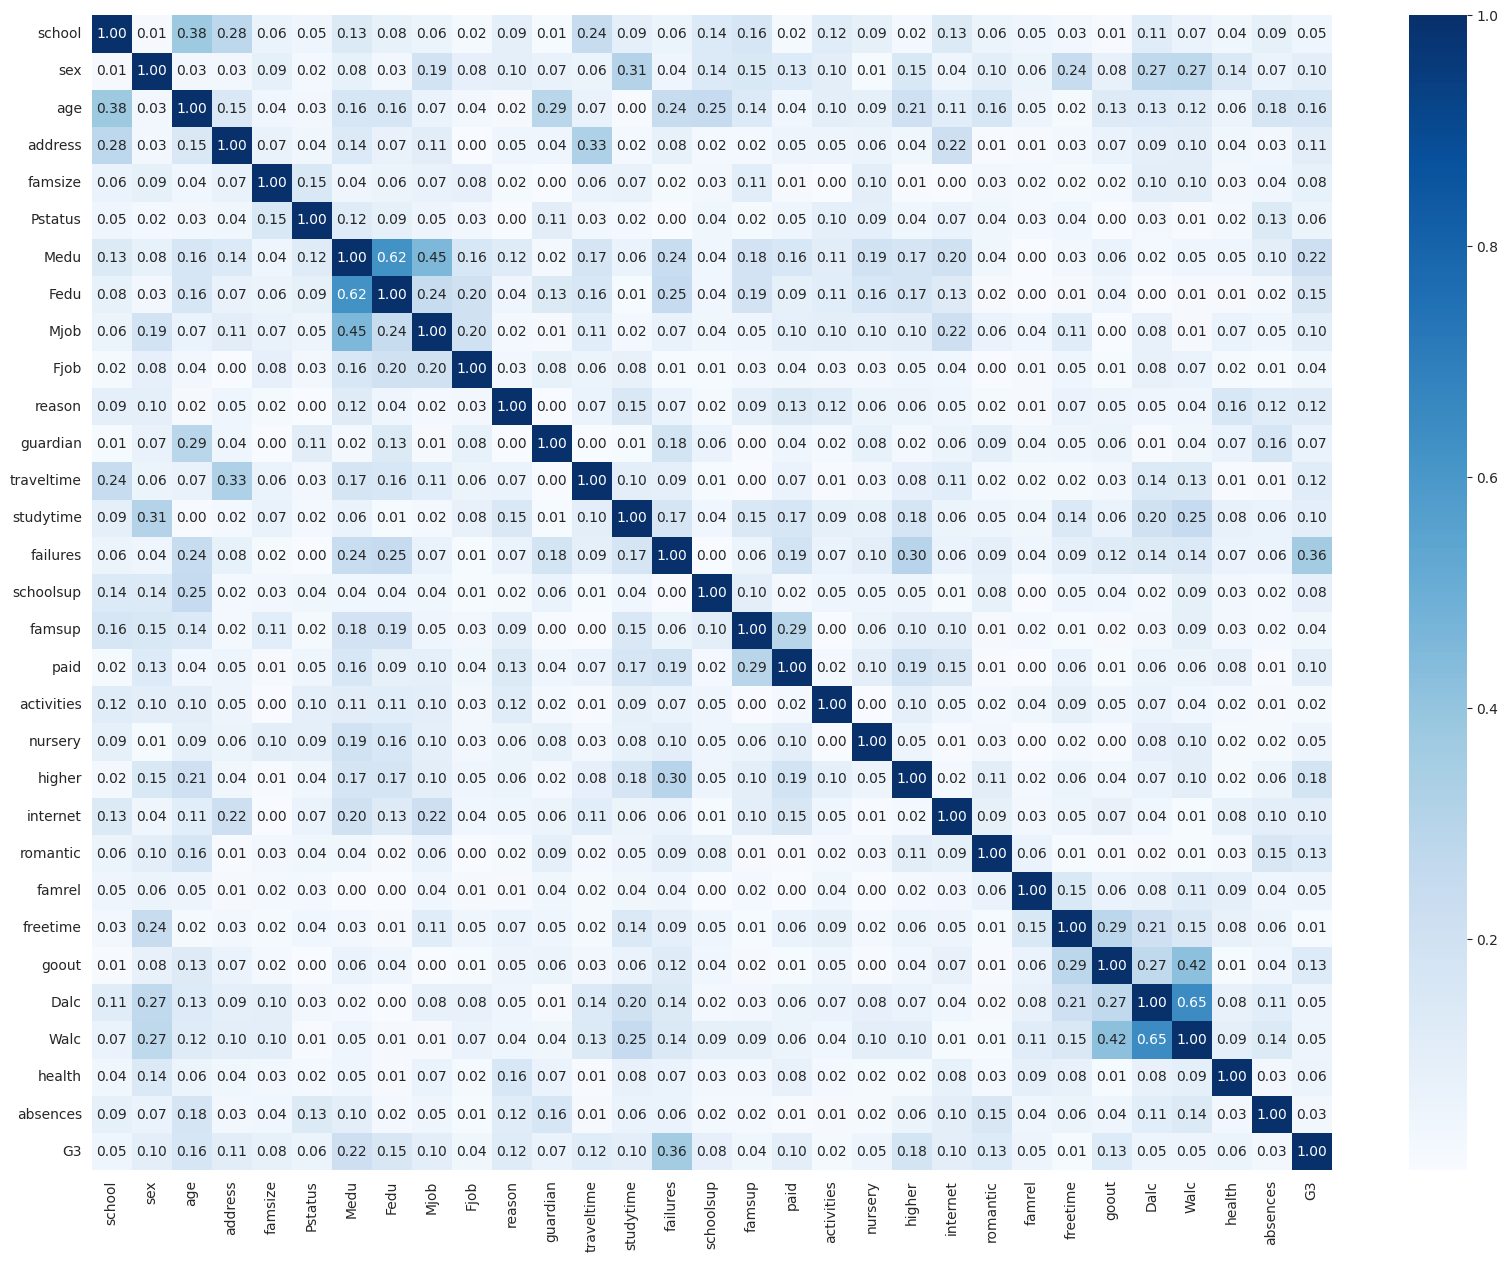

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", ax=ax)
plt.show()

In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 2 columns to remove.


In [ ]:
to_drop

['Fedu', 'Walc']

In [ ]:
X.drop(to_drop, axis='columns', inplace=True)

In [ ]:
mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mean
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6,5.666667
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,6,5.333333
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,10,8.333333
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14.666667
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10,8.666667


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Model (Linear, Gradient, K-Nearest)

In [ ]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)

# Gradient Boosting Regressor Model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_reg_pred = gb_reg.predict(X_test)

# K-Nearest Neighbors Regressor Model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_reg_pred = knn_reg.predict(X_test)

# Regression results function
def regression_results(y_true, y_pred, model_name):
    print(f'{model_name} Results:')
    print('R-squared value: ', round(r2_score(y_true, y_pred), 4))
    print('MAE: ', round(mean_absolute_error(y_true, y_pred), 4))
    print('MSE: ', round(mean_squared_error(y_true, y_pred), 4))
    print('RMSE: ', round(np.sqrt(mean_squared_error(y_true, y_pred)), 4))
    print('')

# Evaluate models
regression_results(y_test, lin_reg_pred, "Linear Regression")
regression_results(y_test, gb_reg_pred, "Gradient Boosting Regressor")
regression_results(y_test, knn_reg_pred, "K-Nearest Neighbors Regressor")

Linear Regression Results:
R-squared value:  0.9388
MAE:  0.7637
MSE:  0.8247
RMSE:  0.9081

Gradient Boosting Regressor Results:
R-squared value:  0.9569
MAE:  0.5609
MSE:  0.5811
RMSE:  0.7623

K-Nearest Neighbors Regressor Results:
R-squared value:  0.8967
MAE:  0.9138
MSE:  1.3906
RMSE:  1.1792



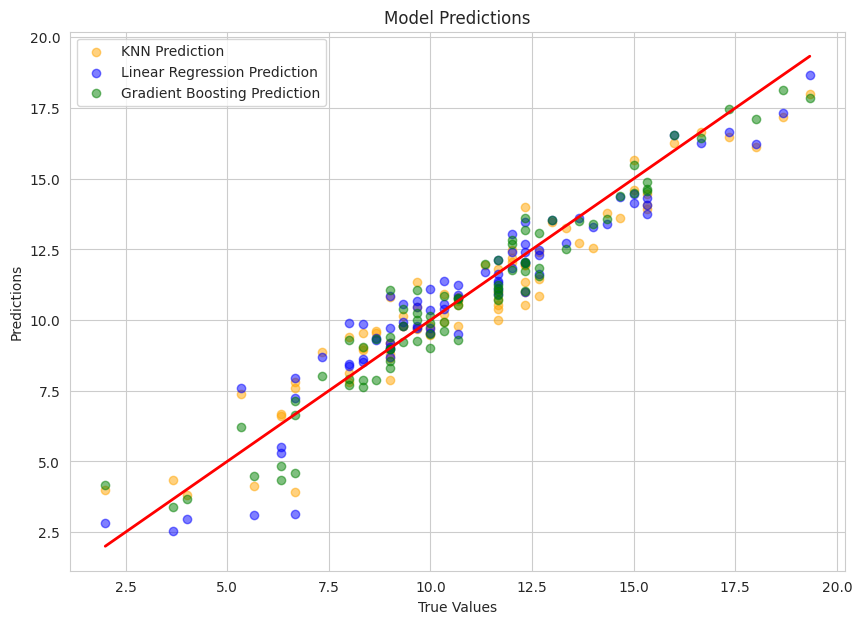

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, knn_reg_pred, alpha=0.5, color='orange', label='KNN Prediction')
plt.scatter(y_test, lin_reg_pred, alpha=0.5, color='blue', label='Linear Regression Prediction')
plt.scatter(y_test, gb_reg_pred, alpha=0.5, color='green', label='Gradient Boosting Prediction')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Model Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

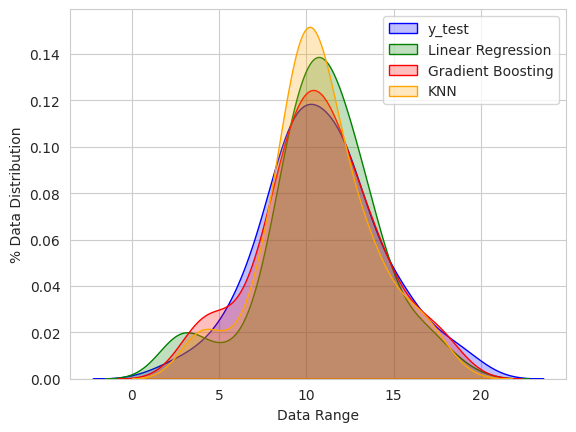

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(y_test, fill=True, label='y_test', color='blue')
sns.kdeplot(lin_reg_pred, fill=True, label='Linear Regression', color='green')
sns.kdeplot(gb_reg_pred, fill=True, label='Gradient Boosting', color='red')
sns.kdeplot(knn_reg_pred, fill=True, label='KNN', color='orange')
plt.legend(['y_test', 'Linear Regression', 'Gradient Boosting', 'KNN'])
plt.xlabel('Data Range')
plt.ylabel('% Data Distribution')
plt.show()

# Result

In [ ]:
def regression_results(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    accuracy = round(r2 * 100, 2)

    print(f'{model_name} Results:')
    print('R-squared value: ', round(r2, 4))
    print(f'Accuracy: {accuracy}%')
    print('MAE: ', round(mean_absolute_error(y_true, y_pred), 4))
    print('MSE: ', round(mean_squared_error(y_true, y_pred), 4))
    print('RMSE: ', round(np.sqrt(mean_squared_error(y_true, y_pred)), 4))
    print('')

regression_results(y_test, lin_reg_pred, "Linear Regression")
regression_results(y_test, gb_reg_pred, "Gradient Boosting Regressor")
regression_results(y_test, knn_reg_pred, "K-Nearest Neighbors Regressor")


Linear Regression Results:
R-squared value:  0.9388
Accuracy: 93.88%
MAE:  0.7637
MSE:  0.8247
RMSE:  0.9081

Gradient Boosting Regressor Results:
R-squared value:  0.9564
Accuracy: 95.64%
MAE:  0.5598
MSE:  0.5873
RMSE:  0.7664

K-Nearest Neighbors Regressor Results:
R-squared value:  0.8967
Accuracy: 89.67%
MAE:  0.9138
MSE:  1.3906
RMSE:  1.1792

